# Python Project - (Prosper Loan Dataset)
## by Tamara Gray

## Introduction

### Prosper Loan Dataset Description

The Prosper Loan dataset that will be used to conduct exploratory analysis includes information for more than 100,000 loans that were made available to the public. It consists of information on the status of each loan indentified by a unique listing key, the borrower rate, the lender yield, information on the borrower of each specific loan amongst other key details. 

### The following questions will be explored in this analysis
1. What are the employment status of the borrowers?
2. What are the most common occupations among borrowers of Prosper Loan?
3. What is the distribution of loan statuses within Prosper Loan's portfolio?
4. How does the borrower rate (interest rate) correlate with the lender's yield?
5. What is the relationship between delinquent accounts and interest rates in Prosper Loan's portfolio?
6. How does the income range of borrowers correlate with the credit grade assigned to their loans?





## Importing the Packages to be used in this analysis

In [86]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset into python


In [87]:
# Loading the dataset for analysis
# The variable will take on the name "loan"
loan = pd.read_csv('Prosper Loan.csv')
loan

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


### Dataset Structure?

The loan dataset contains 113937 rows and 81 columns. It comprises of datatypes such as strings, integers, floats and boolean values. 

### The main features in the loan dataset

The main features in the loan dataset are as follows:
1. ListingKey : Unique key for each listing, same value as the 'key' used in the listing object in the API.
2. CreditGrade: The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-  2009 period and will only be populated for those listings.
3. LoanStatus : The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
4. BorrowerAPR : The Borrower's Annual Percentage Rate (APR) for the loan.
5. BorrowerRate : The Borrower's interest rate for this loan.
6. LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
7. Occupation : The Occupation selected by the Borrower at the time they created the listing.
8. EmploymentStatus : The employment status of the borrower at the time they posted the listing.
9. CurrentDelinquencies : Number of accounts delinquent at the time the credit profile was pulled.
10. StatedMonthlyIncome : The monthly income the borrower stated at the time the listing was created.

### Features in the dataset that supports the investigation into the feature(s) of interest

The features that will assit in this analysis are:
1. The interest rate
2. Monthly income of the borrower
3. Loan Status
4. Occupation of the borrower
5. Credit grade of the loan
6. Prosper loan's yield

# Univariate Exploration

The following univariate analysis will be done to gain insights on the demographics of the customers at Prosper Loan:
1. What is the employment statuses of the borrowers?
2. What are the most common occupations among borrowers of Prosper Loan?
3. What is the distribution of loan statuses within Prosper Loan's portfolio?


## Question 1: What is the employment status of the borrowers?

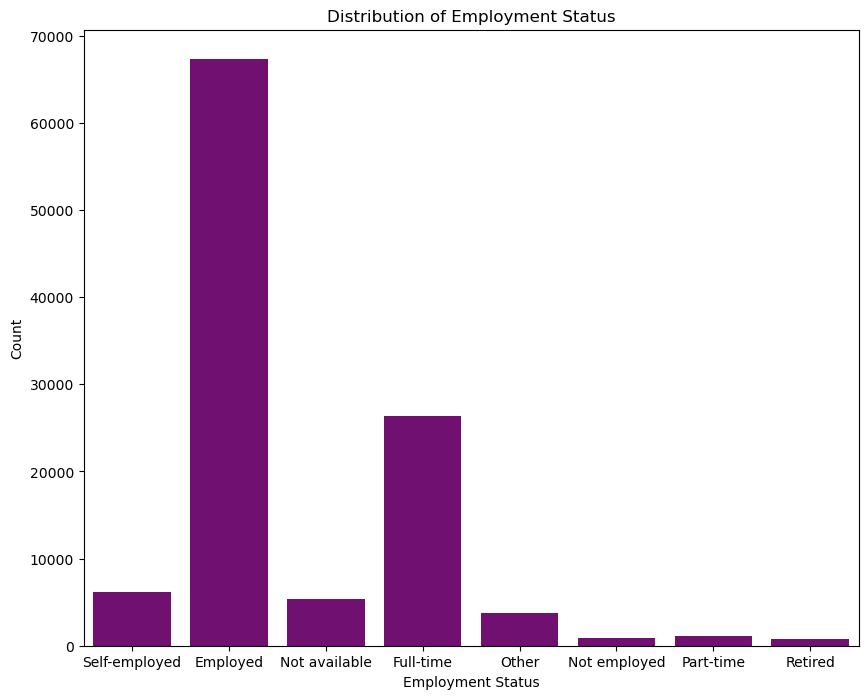

In [106]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=loan, x='EmploymentStatus', color='Purple')
ax.set_xlabel('Employment Status')
ax.set_ylabel('Count')
ax.set_title('Distribution of Employment Status');



> Based on the distribution of employment status above, the following observations were seen: 

   >1. Self-Employed: There are 6,134 individuals who are self-employed. Self-employment often refers to individuals who work for themselves and operate their own business or freelance.

  >2. Employed: The majority of individuals fall into the employed category, with 67,322 individuals. This indicates that a significant portion of borrowers are currently engaged in some form of employment.

  >3. Not Available: There are 5,347 individuals for whom the employment status is listed as "Not available." This category may include cases where the information about employment status is missing or not provided.

  >4. Full Time: A substantial number of individuals, 26,355 in total, are classified as being employed full time. Full-time employment generally refers to individuals who work a standard number of hours per week, typically 35-40 hours.

 >5. Other: The "Other" category includes 3,806 individuals. This suggests that there are individuals whose employment status falls into a distinct category not specified in the given dataset.

 >6. Not Employed: There are 835 individuals who are classified as "Not employed." This category typically includes individuals who are actively seeking employment but are currently unemployed.

 >7. Part-Time: The part-time category consists of 1,088 individuals. This suggests that there is a portion of the borrowers who are employed on a part-time basis, meaning they work fewer hours compared to full-time employees.

 >8. Retired: The retired category includes 795 individuals. This indicates that there are some borrowers who are no longer actively employed due to retirement.

>Overall, the distribution of employment status provides insights into the composition of the borrowers of Prosper Loan. The majority of individuals are employed, with a significant portion engaged in full-time employment. Additionally, there are notable groups such as the self-employed, part-time workers, and individuals in various other employment categories. The "Not available" category suggests a portion of missing or unreported employment status information, while the "Not employed" category indicates individuals actively seeking employment.

## Question 2: What are the most common occupation amongst borrowers of Prosper Loan?

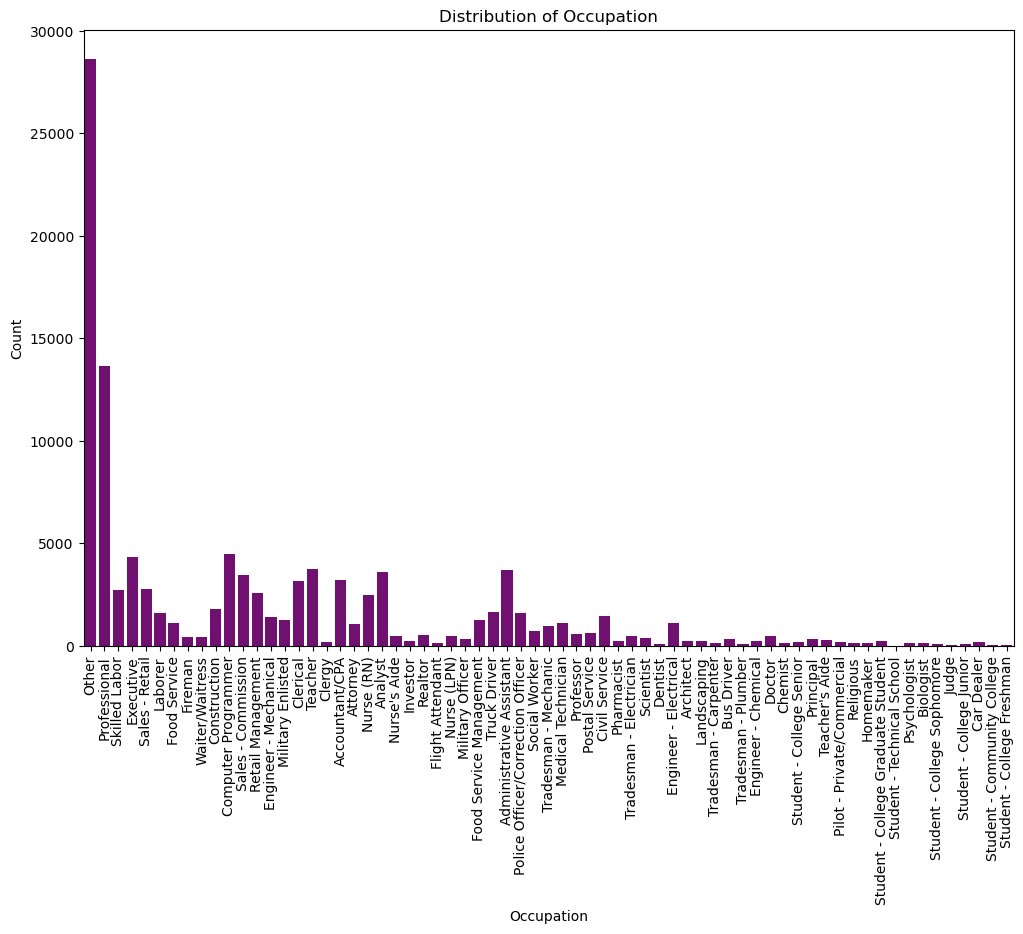

In [132]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=loan, x='Occupation', color='purple')
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')
ax.set_title('Distribution of Occupation')
plt.xticks(rotation=90);


> Based on the distribution of occupations, the following insights can be drawn from the main occupations of the borrowers :

> 1. Other: The most prevalent occupation category is labeled as "Other," which includes 28,617 individuals. This category likely encompasses various occupations not specifically listed in the given dataset.

> 2. Professional: The professional category is the second-largest group, with 13,628 individuals. This category generally includes individuals engaged in occupations that require specialized knowledge and expertise, such as doctors, lawyers, accountants, etc.

> 3. Executive: There are 4,311 individuals classified as executives. This category typically includes individuals holding high-level managerial positions in organizations, such as CEOs, CFOs, or other top-level executives.

> 4. Computer Programmer: The computer programmer category consists of 4,478 individuals. This suggests a significant number of individuals in the dataset are engaged in programming and software development roles.

> 5. Administrative Assistant: The administrative assistant category includes 3,688 individuals. These individuals typically provide support and assistance to managers and other professionals within an organization.

> 6. Electrical Engineer: There are 1,125 individuals identified as electrical engineers. This occupation category refers to professionals who design, develop and maintain electrical systems and components.

> 7. Teacher: The teacher category consists of 3,759 individuals. This suggests that a portion of the sample is engaged in educational occupations including teachers at various levels such as primary, secondary or higher education.

> 8. Sales Commission: There are 3,446 individuals listed in the sales commission category. This suggests a significant presence of individuals involved in sales roles particularly those compensated based on commission.

> 9. Construction: The construction category includes 1,790 individuals. This indicates that a portion of the sample is engaged in various construction-related occupations such as carpenters, electricians, plumbers or other roles within the construction industry.

> Overall, the distribution of occupations provides insights into the composition of the borrowers in terms of their professional roles. The "Other" category indicates the presence of diverse occupations not explicitly listed. The sample includes a significant number of professionals in fields such as computer programming, administration, teaching, and sales. Additionally, there is a notable presence of individuals in executive, electrical engineering, and construction occupations. This distribution sheds light on the diversity of occupations within the borrowing population of Prosper loan and provides an overview of the main occupational groups represented.

## Question 3: What is the distribution of loan statuses within Prosper Loan's portfolio?

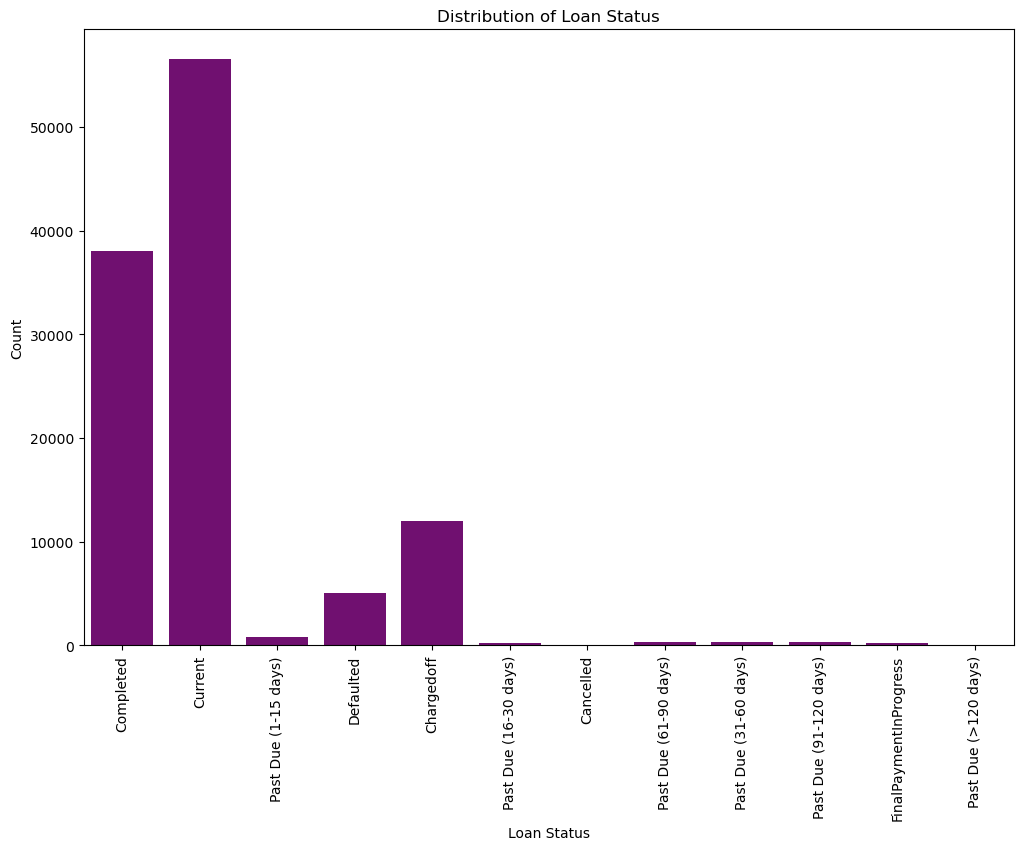

In [141]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=loan, x='LoanStatus', color='Purple')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Status')
plt.xticks(rotation=90);

> Based on the provided distribution of loan statuses, the follwoing analysis can be derived:

> 1. Cancelled: There are 5 loans that have been cancelled. This category represents loans that have been terminated or voided before completion.

> 2. ChargeOff: The majority of loans fall into the ChargeOff category, with 11,992 loans. ChargeOff typically refers to loans that are considered unlikely to be fully repaid and are removed from the lender's books as a loss.

> 3. Completed: There are 38,074 loans that have been successfully completed. This category represents loans that have been fully repaid according to the agreed-upon terms.

> 4. Current: The largest category is Current, with 56,576 loans. Current loans are those that are currently active and being repaid according to the agreed-upon terms.

> 5. Defaulted: There are 5,018 loans that have been classified as defaulted. Defaulted loans are those where the borrower has failed to make payments according to the loan agreement.

> 6. FinalPaymentInProgress: There are 205 loans that are in the final stages of repayment, where the final payment is in progress.

> 7. Past Due (1-15 days): There are 806 loans that are overdue by 1 to 15 days, indicating that the borrower has missed their payment due date but is within a relatively short period of delay.

> 8. Past Due (16-30 days): There are 265 loans that are overdue by 16 to 30 days, indicating a slightly longer delay in repayment.

> 9. Past Due (31-60 days): There are 363 loans that are overdue by 31 to 60 days, indicating a further delay in repayment.

> 10. Past Due (61-90 days): There are 313 loans that are overdue by 61 to 90 days, suggesting a more significant delay in repayment.

> 11. Past Due (91-120 days): There are 304 loans that are overdue by 91 to 120 days, indicating a prolonged delay in repayment.

> 12. Past Due (> 120 days): The smallest category is Past Due (> 120 days), with 16 loans that are significantly overdue, beyond 120 days.

> This distribution of loan statuses provides insights into the current state of loans in terms of their repayment status. It indicates the number of loans that have been cancelled, charged off, completed, or are in various stages of repayment, as well as the number of loans that have defaulted or are past due at different intervals. This analysis can help understand the overall loan portfolio and identify potential areas of concern, such as loans in default or with significant delinquencies.

# Bivariate Exploration

The following bivariate analysis will be done to gain insights on the relationship between quantitative variables:

4. How does the borrower rate (interest rate) correlate with the lender's yield?
5. What is the relationship between delinquent accounts and interest rates in Prosper Loan's portfolio?
6. How does the monthly income of borrowers correlate with the credit grade assigned to their loans?


## Question 4: How does the borrower rate (interest rate) correlate with the lender's yield??

<Axes: xlabel='BorrowerRate', ylabel='LenderYield'>

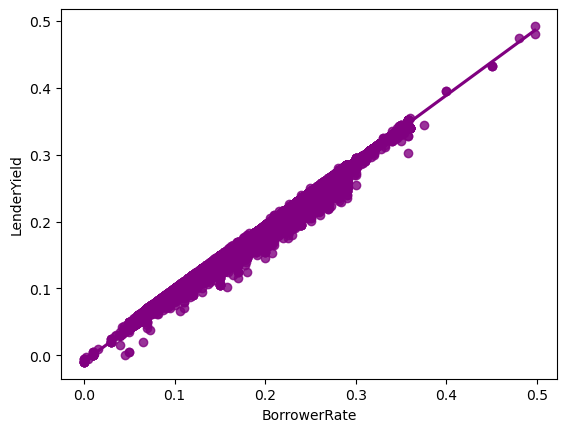

In [134]:
sns.regplot(data=loan,x='BorrowerRate', y='LenderYield', color='purple')

> The upward diagonal line observed in the scatter plot above between "BorrowerRate" (interest rate) and "Lender's Yield" (interest rate minus servicing fee) suggests a positive relationship between the two variables. Below outlines a few possible analyses based on this observation:

1. Positive correlation: The scatter plot's upward diagonal line indicates a positive correlation between "BorrowerRate" and "Lender's Yield." It suggests that as the interest rate for borrowers increases, the lender's yield also tends to increase. This relationship implies that loans with higher interest rates also provide higher yields for lenders.

2. Servicing fee impact: The diagonal line can provide insights into the impact of the servicing fee on the lender's yield. Since the lender's yield is calculated by subtracting the servicing fee from the interest rate, the upward line suggests that loans with higher interest rates tend to have higher servicing fees. This analysis highlights the role of the servicing fee in determining the lender's yield and how it affects the overall relationship between borrower rates and lender's yields.

3. Pricing strategy: The scatter plot's pattern may indicate a consistent pricing strategy employed by Prosper Loan. The upward diagonal line suggests that Prosper Loan adjusts the interest rate and servicing fee in combination, resulting in a proportional increase in both borrower rates and lender's yields. This pricing strategy may be influenced by various factors such as market conditions, risk assessment or profitability targets.

4. Potential risk-reward tradeoff: The positive relationship between borrower rates and lender's yields implies a potential risk-reward tradeoff. Loans with higher interest rates may correspond to higher perceived risk for borrowers and lenders compensate for this increased risk by demanding a higher yield. This analysis suggests that Prosper Loan considers the risk associated with higher interest rate loans and aims to balance it with the expected return for lenders.

To further investigate these insights and draw more conclusive interpretations, it would be helpful to assess additional factors such as loan duration, loan amount, borrower creditworthiness, or other variables that could influence the pricing and relationship between borrower rates and lender's yields.



## Question 5: What is the relationship between delinquent accounts and interest rates in Prosper Loan's portfolio?

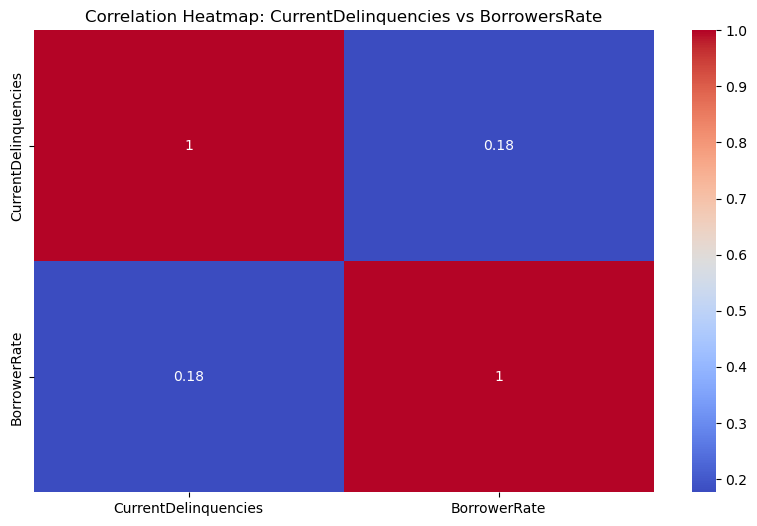

In [136]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=loan[['CurrentDelinquencies', 'BorrowerRate']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: CurrentDelinquencies vs BorrowersRate')
plt.show()

> The output of the correlation heatmap above suggests a positive correlation of approximately 0.18 between the variables "CurrentDelinquencies" and "BorrowerRate". Outlined below are some possible analyses based on this relationship:

1. Weak positive correlation: The correlation coefficient of 0.18 indicates a weak positive correlation between "CurrentDelinquencies" and "BorrowerRate". This means that there is a slight tendency for the two variables to move together but the relationship is not very strong. As "CurrentDelinquencies" increase, there is a small tendency for "BorrowerRate" to also increase.

2. Potential risk assessment: The positive correlation suggests that there may be a connection between delinquency rates and the interest rates offered to borrowers. A higher number of current delinquencies may be an indication of increased risk leading to lenders offering higher interest rates to compensate for the potential default or late payments. This analysis suggests that Prosper Loan might adjust interest rates based on the level of delinquencies in the loan portfolio.

3. Limited impact: Since the correlation coefficient is relatively low, it indicates that "CurrentDelinquencies" have a modest influence on the "BorrowerRate". Other factors, such as creditworthiness, loan terms or market conditions may have a more significant impact on determining the interest rates offered to borrowers.

4. Further analysis required: While the correlation coefficient provides a measure of the linear relationship between the variables, it is essential to consider other factors and conduct further analysis to fully understand the relationship. It would be beneficial to explore additional variables and perform statistical tests or regression analysis to assess the significance and strength of the relationship while controlling for other factors.

Remember, correlation does not imply causation. The observed correlation between "CurrentDelinquencies" and "BorrowerRate" suggests an association but it does not necessarily mean that one variable directly causes changes in the other. Further investigation and analysis are required to draw more definitive conclusions about the relationship between these variables. 

## Question 6: How does the monthly income of borrowers correlate with the credit grade assigned to their loans?

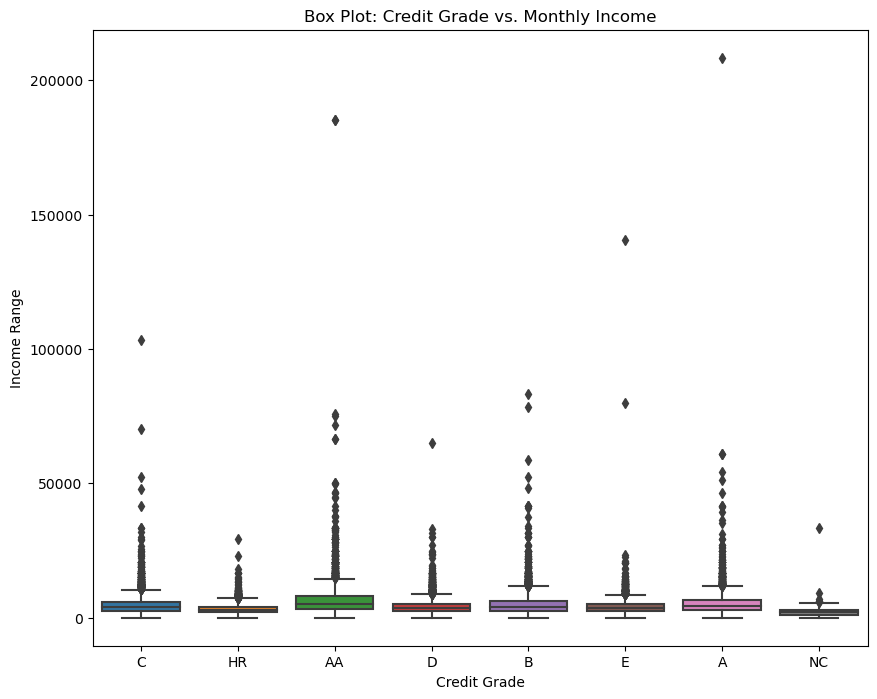

In [140]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=loan, x='CreditGrade', y='StatedMonthlyIncome')
plt.xlabel('Credit Grade')
plt.ylabel('Income Range')
plt.title('Box Plot: Credit Grade vs. Monthly Income')
plt.show()

> The following are some observations from the box plot above:

1. Credit Grade C: The majority of data points for this credit grade are centered around 50,000   monthly income indicating that borrowers in this category generally have a consistent income level. There is one outlier above 100,000, suggesting that some borrowers with Credit Grade C may have relatively higher incomes.

2. Credit Grade HR: The majority of data points for this credit grade are below 40,000 monthly income, indicating that borrowers in this category generally have lower incomes. This suggests that borrowers with Credit Grade HR may have higher risk profiles based on their income levels.

3. Credit Grade AA: The majority of data points for this credit grade are below or around 50,000 monthly income. However, there are a few data points below 100,000 and one data point above 150,000 suggesting some variability in income levels for borrowers with Credit Grade AA.

4. Credit Grade D: The majority of data points for this credit grade are below 50,000 monthly income, similar to Credit Grade AA. However, there is one outlier above 50,000, indicating that some borrowers in this category may have higher incomes.

5. Credit Grade B: The majority of data points for this credit grade are below or around 50,000 monthly income, similar to Credit Grades AA and D. There is one data point slightly above 50,000 suggesting a slightly higher income level for some borrowers in this category.

6. Credit Grade E: The majority of data points for this credit grade are below 30,000 monthly income, indicating that borrowers in this category generally have lower incomes. However, there are two data points below 100,000 and one data point below 150,000 suggesting some variability in income levels.

7. Credit Grade A: The majority of data points for this credit grade are below or around $50,000 monthly incomesimilar to Credit Grades AA, B, and D. There is one data point above 200,000 indicating that some borrowers in this category may have significantly higher incomes.

8. Credit Grade NC: The majority of data points for this credit grade are below 20,000 monthly income, indicating that borrowers in this category generally have lower incomes. However, there is one data point at 30,000 suggesting some variability.

Overall, the box plot analysis provides insights into the distribution of monthly income points across different credit grades. It highlights the income levels associated with each credit grade and allows for comparisons and identification of potential patterns. It suggests that income plays a role in determining credit grades with some variations observed within certain credit grade categories.



## Conclusions
>In conclusion, the analysis of the Prosper Loan dataset reveals several key observations and insights:

1. Employment Status: The majority of borrowers are employed, with a significant portion engaged in full-time employment. However, there are also notable groups such as the self-employed, part-time workers and individuals in various other employment categories. The presence of a "Not available" category suggests missing or unreported employment status information while the "Not employed" category indicates individuals actively seeking employment.

2. Occupations: The dataset includes diverse occupations, with the largest category labeled as "Other." This suggests the presence of various occupations not explicitly listed. Additionally, there is a notable representation of professionals in fields such as computer programming, administration, teaching, sales, executive positions, electrical engineering and construction. This distribution provides an overview of the main occupational groups represented among the borrowers.

3. Loan Statuses: The loan statuses indicate the current state of loans in terms of repayment. The largest category is "Current," representing loans that are active and being repaid according to the agreed-upon terms. Other categories include "ChargeOff" for loans unlikely to be fully repaid, "Completed" for loans that have been successfully repaid and various stages of delinquency and default. This analysis helps understand the overall loan portfolio and identify potential areas of concern.

4. Borrower Rate and Lender's Yield: There is a positive correlation between borrower rates and lender's yields suggesting that higher interest rates result in higher yields for lenders. This relationship indicates a potential risk-reward tradeoff and highlights the role of the servicing fee in determining the lender's yield. The pricing strategy employed by Prosper Loan seems to adjust both the interest rate and servicing fee in combination.

5. Current Delinquencies and Borrower Rate: A weak positive correlation exists between current delinquencies and borrower rates. This suggests a potential connection between delinquency rates and the interest rates offered to borrowers, with higher delinquencies possibly leading to higher interest rates. However, the impact of current delinquencies on borrower rates appears to be limited compared to other factors such as creditworthiness and market conditions.

6. Credit Grades and Monthly Income: The box plot analysis of credit grades and monthly income indicates income levels associated with each credit grade. There are variations within certain credit grade categories but generally, lower credit grades tend to be associated with lower incomes while higher credit grades are associated with higher incomes. Some credit grades show consistent income levels while others exhibit variability and outliers.

Overall, these observations provide valuable insights into the composition of the borrowing population, their employment status, occupations, loan statuses, interest rates and income levels. They contribute to a better understanding of the Prosper Loan dataset and can inform further analysis and decision-making related to loan portfolio management, risk assessment and pricing strategies.


In [143]:
loan.to_csv('Prosper_Loan_Final')

